# Part3

***For part 3, We are going to use pandas-on-spark Data Frame to view different variables mean across season based on features of pandas-on-spark to make things easier than what we had done in HW4, also we will convert it back to normal pandas data frame to make some plots.***

* Import modules that we need for data frame transformation

In [1]:
import os
import sys
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

* read in the full nfl data set and covert it into pandas-on-Spark data frame

In [2]:
pdf = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")
psdf = ps.from_pandas(pdf)

* Use for loop to specify which variable in the data is needed to view, and extract the information of these three variables and append each of them into three different lists

In [3]:
Mean = []
Std = []
Name = []
for i in list(psdf.columns):
    if i in ['AQ1','AQ2','AQ3','AQ4','AFinal','HQ1','HQ2','HQ3','HQ4','HFinal']:
        Mean.append(psdf[i].mean())
        Std.append(psdf[i].std())
        Name.append(str(i))
    else:
        continue

* Zip the three list into one Data frame for future usage

In [4]:
Mean_psdf = pd.DataFrame(zip(Name,Mean,Std),columns = ["Variable","Mean","Std"])
Mean_psdf

,Variable,Mean,Std
0,AQ1,3.924806,4.490700
1,AQ2,6.241429,5.221593
2,AQ3,4.386920,4.632717
3,AQ4,5.890233,5.278775
4,AFinal,20.557188,10.195586
5,HQ1,4.828868,4.726903
6,HQ2,7.105157,5.702788
7,HQ3,4.791126,4.755145
8,HQ4,6.322962,5.417310
9,HFinal,23.174013,10.405952


* Use the method `groupby` and `mean` method to build a data frame for each required variables across seasons

In [5]:
meanps = psdf.groupby("season").mean()
meanps = meanps[['AQ1', 'AQ2', 'AQ3',
'AQ4', 'AFinal', 'HQ1', 'HQ2', 'HQ3', 'HQ4', 'HFinal']]
meanps

,AQ1,AQ2,AQ3,AQ4,AFinal,HQ1,HQ2,HQ3,HQ4,HFinal
season,,,,,,,,,,
2002,4.037453,6.022472,4.449438,5.928839,20.640449,4.307116,7.411985,4.715356,6.426966,23.018727
2003,3.558052,6.093633,3.913858,5.355805,19.112360,5.026217,6.625468,4.561798,6.295880,22.677903
2004,3.913858,6.265918,4.153558,5.797753,20.239700,4.943820,7.071161,4.250936,6.561798,22.906367
2005,3.887640,5.543071,4.029963,5.191011,18.786517,4.393258,7.426966,4.677903,5.737828,22.314607
2006,3.629213,6.179775,4.303371,6.063670,20.254682,4.606742,6.041199,4.565543,5.932584,21.258427
2007,3.696629,6.220974,4.337079,5.872659,20.228464,5.026217,7.074906,4.913858,6.018727,23.157303
2008,3.801498,6.498127,4.074906,6.423221,20.842697,5.179775,7.205993,4.595506,6.044944,23.183521
2009,3.868914,6.202247,4.299625,5.943820,20.382022,4.737828,7.790262,4.228464,5.887640,22.779026
2010,3.973783,6.865169,4.629213,5.704120,21.318352,4.576779,6.771536,4.868914,6.681648,23.000000


* After we have the pandas-on-spark data frame, we convert it back to pandas data frame as the requirement said.

In [6]:
one = meanps.to_pandas()
one

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pyspark\pandas\utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


,AQ1,AQ2,AQ3,AQ4,AFinal,HQ1,HQ2,HQ3,HQ4,HFinal
season,,,,,,,,,,
2002,4.037453,6.022472,4.449438,5.928839,20.640449,4.307116,7.411985,4.715356,6.426966,23.018727
2003,3.558052,6.093633,3.913858,5.355805,19.112360,5.026217,6.625468,4.561798,6.295880,22.677903
2004,3.913858,6.265918,4.153558,5.797753,20.239700,4.943820,7.071161,4.250936,6.561798,22.906367
2005,3.887640,5.543071,4.029963,5.191011,18.786517,4.393258,7.426966,4.677903,5.737828,22.314607
2006,3.629213,6.179775,4.303371,6.063670,20.254682,4.606742,6.041199,4.565543,5.932584,21.258427
2007,3.696629,6.220974,4.337079,5.872659,20.228464,5.026217,7.074906,4.913858,6.018727,23.157303
2008,3.801498,6.498127,4.074906,6.423221,20.842697,5.179775,7.205993,4.595506,6.044944,23.183521
2009,3.868914,6.202247,4.299625,5.943820,20.382022,4.737828,7.790262,4.228464,5.887640,22.779026
2010,3.973783,6.865169,4.629213,5.704120,21.318352,4.576779,6.771536,4.868914,6.681648,23.000000


* Utilize `plot` method to plot the mean data frame after converting 

Text(0, 0.5, 'Mean')

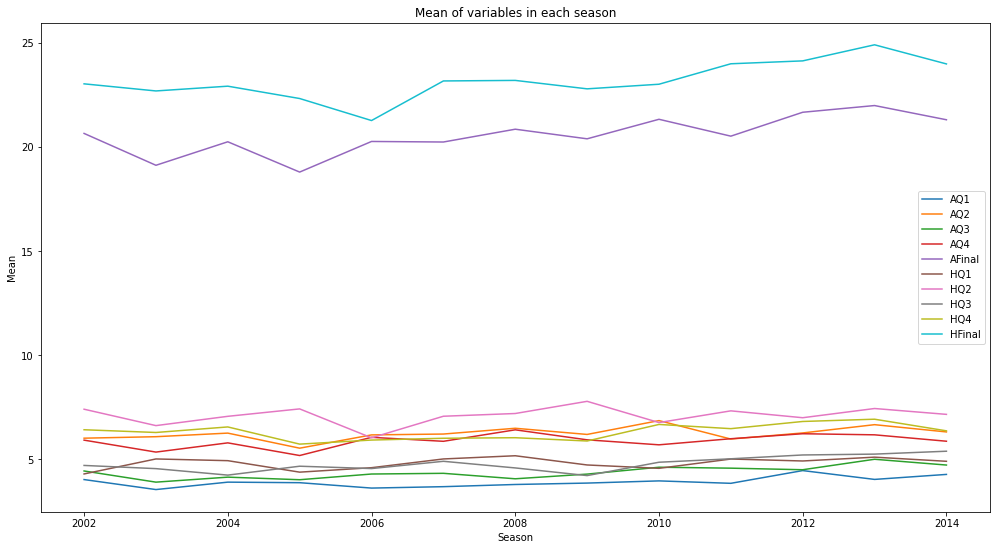

In [7]:
one.plot(figsize=(17, 9))

plt.title("Mean of variables in each season")

plt.xlabel("Season")

plt.ylabel("Mean")